## **Zadanie 1 - Gradient Prosty**

Cel zadania polega na implementacji algorytmu gradientu prostego oraz zbadaniu jego zachowania dla różnych wartości wymienionych niżej hiperparametrów. Metodę należy zastosować dla następujących funkcji:
- $f(x) = x_1^2 + x_2^2$
- funkcja [Matyas](https://www.sfu.ca/~ssurjano/matya.html) (dla 2 wymiarów)

Kroki do wykonania:
1. Zaimplementuj algorytm gradientu prostego.
2. Zbadaj wpływ wartości parametru kroku na zbieżność metody - należy sporządzić wykres par (wartość funkcji celu, nr iteracji).
3. Dla ustalonej wartości parametru kroku zbadaj zachowanie algorytmu dla trzech wybranych punktów startowych. Wyniki przedstaw w postaci wizualnej.

**Uwagi:**
- Zaimplementowana metoda powinna być uniwersalna, tzn. działać dla dowolnej zadanej funkcji celu.
- Warunki stopu: maksymalna liczba iteracji, zbieżność gradientu.
- Gradient można liczyć z definicji, bądź też użyć np. modułu autograd.

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from typing import List, Callable, Tuple

In [2]:
# define constants
MIN_X = -10
MAX_X = 10
PLOT_STEP = 100

In [3]:
max_iter = 20_000
epsilon = 1e-6
learning_rate = 0.1
learning_rate_list = [0.1, 0.01, 0.001, 0.0001]

### **1. Definicja funkcji celu i jej gradientu**

In [4]:
def func(x: np.ndarray) -> float:
    return np.sum(x**2)

In [5]:
def func_dfdx(x: np.ndarray) -> np.ndarray:
    return 2 * x

In [6]:
def matyas(x: np.ndarray) -> float:
    return 0.26 * (x[0]**2 + x[1]**2) - 0.48 * x[0] * x[1]

In [7]:
def matyas_dfdx(x: np.ndarray) -> np.ndarray:
    return np.array([0.52*x[0] - 0.48*x[1], 0.52*x[1] - 0.48*x[0]])

### **2. Wizualizacja funkcji celu**

In [14]:
def get_meshgrid_input(min_x: float=MIN_X, max_x: float=MAX_X, step: int=PLOT_STEP) -> np.ndarray:
    """
    Create a meshgrid for the input space.

    Parameters:
        min_x (float): Minimum value for the x-axis.
        max_x (float): Maximum value for the x-axis.
        step (int): Number of steps for the meshgrid.

    Returns:
        np.ndarray: The meshgrid for the input space.
    """
    x1 = np.linspace(min_x, max_x, step)
    x2 = np.linspace(min_x, max_x, step)
    X1, X2 = np.meshgrid(x1, x2)
    return X1, X2

In [15]:
def visualize_func_3d(obj_fun: Callable[[np.ndarray], float], trajectory: np.ndarray = None) -> None:
    """
    Visualize the objective function and the gradient descent trajectory in 3D.

    Parameters:
        obj_fun (Callable[[np.ndarray], float]): The objective function.
        trajectory (np.ndarray): The trajectory of the gradient descent.
    """
    # calculate output for the objective function
    X1, X2 = get_meshgrid_input()
    Z = np.apply_along_axis(obj_fun, 0, np.array([X1, X2]))

    # plot the 3D surface
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.8)

    # set labels and title
    ax.set_xlabel('x1', labelpad=10)
    ax.set_ylabel('x2', labelpad=10)
    ax.set_zlabel('Objective Function Value', labelpad=10)
    ax.set_title('Objective Function Visualization')


    # plot the trajectory
    if trajectory is not None:
        # get the minimum point
        min_point = trajectory[-1]
        min_x, min_y = min_point[0], min_point[1]

        # plot the minimum point and the trajectory
        ax.scatter(min_x, min_y, func(np.array([min_x, min_y])), color='yellow', label='Minimum found by gradient descent alg.')
        ax.plot(trajectory[:, 0], trajectory[:, 1], np.array(Z), marker='o', color='red', label='Gradient Descent Steps', alpha=0.5)

        plt.legend()

    ax.set_box_aspect(aspect=None, zoom=0.8)
    plt.show()

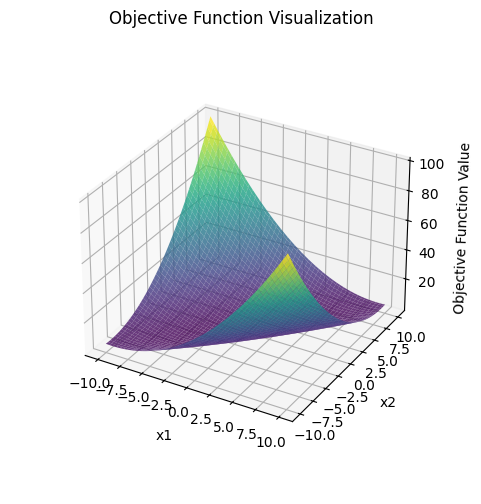

In [16]:
visualize_func_3d(matyas)

### **3. Implementacja algorytmu gradientu prostego**

In [17]:
def gradient_descent(
    grad_dfdx: Callable[[np.ndarray], np.ndarray],
    func: Callable[[np.ndarray], float],
    x: np.ndarray,
    learning_rate: float,
    max_iter: int,
    gradient_tolerance: float,
) -> Tuple[List[np.ndarray], List[np.ndarray]]:
    """
    Calculate the gradient descent trajectory for a function.

    Parameters:
        grad_dfdx (Callable[[np.ndarray], np.ndarray]): Calculates the gradient of the function at a point.
        x (np.ndarray): The initial point.
        learning_rate (float): Step size for the gradient descent.
        max_iter (int): Maximum number of iterations.
        gradient_tolerance (float): Convergence criterion for the gradient.

    Returns:
        List[np.ndarray]: The trajectory of the gradient descent.
        List[np.ndarray]: The function values.
    """
    trajectory = [x.copy()]
    func_val = [func(x)]

    for _ in range(max_iter):
        dfdx = grad_dfdx(x)
        if np.linalg.norm(dfdx) < gradient_tolerance:
            print(f'Gradient descent converged after {len(trajectory)} iterations.')
            break

        x -= learning_rate * dfdx
        trajectory.append(x.copy())
        func_val.append(func(x))

    return trajectory, func_val

In [18]:
trajectory, func_val = gradient_descent(matyas_dfdx, matyas, np.array([3.0, 3.0]), learning_rate, max_iter, epsilon)

Gradient descent converged after 3006 iterations.


### **4. Wizualizacja zbieżności algorytmu**

In [19]:
def visualize_fun(obj_fun: Callable[[np.ndarray], float], trajectory: np.ndarray) -> None:
    """
    Visualize the objective function and the gradient descent trajectory.

    Parameters:
        obj_fun (Callable[[np.ndarray], float]): The objective function.
        trajectory (np.ndarray): The trajectory of the gradient descent.
    """
    min_point = trajectory[-1]
    min_x, min_y = min_point[0], min_point[1]

    print(f"Minimum found at x = {np.round(min_x, 2)}, y = {np.round(min_y, 2)}, f(x, y) = {np.round(obj_fun(min_point), 2)}")
    print(f"Number of steps: {len(trajectory) - 1}")

    X1, X2 = get_meshgrid_input()
    Z = np.apply_along_axis(obj_fun, 0, np.array([X1, X2]))

    plt.figure(figsize=(8, 6))
    plt.pcolormesh(X1, X2, Z, cmap='viridis', shading='auto')
    plt.colorbar(label='Wartość funkcji celu')
    plt.xlabel('x1')
    plt.ylabel('x2')
    # plt.title('Wizualizacja funkcji celu')

    plt.scatter(min_x, min_y, color='yellow', label='Minimum znalezione przez algorytm.')
    plt.plot(trajectory[:, 0], trajectory[:, 1], marker='.', color='red', label='Kroki algorytmu gradientu prostego', alpha=0.5)

    plt.legend()
    plt.show()

In [20]:
func_trajectory, func_val = gradient_descent(
    matyas_dfdx,
    matyas,
    np.array([5.0, 9.0]),
    0.001,
    10_000,
    1e-6,
)

Minimum found at x = 4.69, y = 4.69, f(x, y) = 0.88
Number of steps: 10000


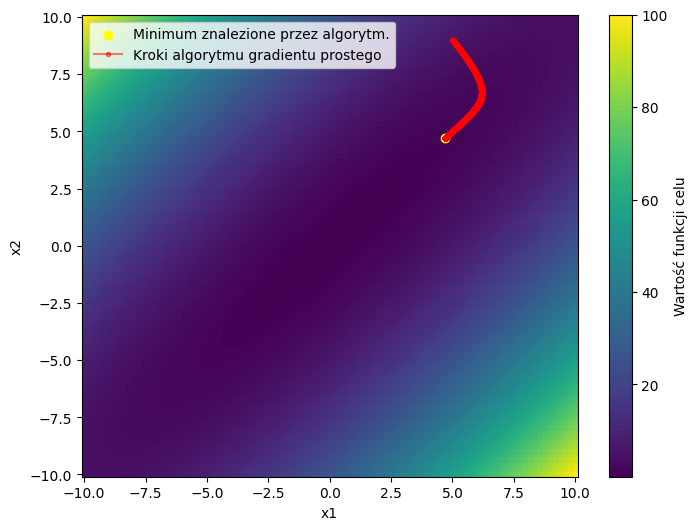

In [21]:
visualize_fun(matyas, np.array(func_trajectory))

### **5. Wizualizacja zmiany wartości funkcji celu w zależności od liczby iteracji**

In [97]:
function_results = []

for learning_rate in learning_rate_list:
    trajectory, func_val = gradient_descent(
        func_dfdx,
        func,
        np.array([-1.0, 9.0]),
        learning_rate,
        max_iter,
        1e-6,
    )
    function_results.append(func_val)

Gradient descent converged after 76 iterations.
Gradient descent converged after 829 iterations.
Gradient descent converged after 8349 iterations.


In [98]:
def visualize_value_change(func_val: List[List[float]], learning_rates: List[float]) -> None:
    """
    Visualize the change in the objective function value over iterations.

    Parameters:
        func_val (List[float]): The objective function value over iterations.
    """
    plt.figure(figsize=(8, 6))
    for i in range(len(func_val)):
        plt.plot(func_val[i], marker='.', label=f'{learning_rates[i]}', alpha=0.5)

    plt.grid(True)
    plt.xlabel('Numer iteracji')
    plt.ylabel('Wartość funkcji celu')
    plt.title('Zmiana wartości funkcji celu w zależności od kroku uczenia')

    legend = plt.legend()
    legend.set_title('Krok uczenia')

    legend.set_bbox_to_anchor((1, 1))
    plt.show()

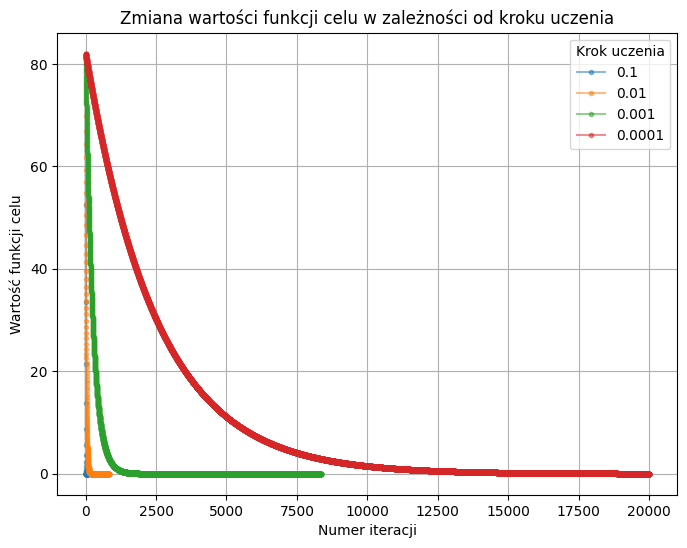

In [99]:
visualize_value_change(function_results, learning_rate_list)